**Problem:**  
The 'date' column error when I use the to_datetime() or astype() to change the data type


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
vaccination = pd.read_csv('data/country_vaccinations.csv')

In [74]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

In [11]:
# daily 백신을 보면 하루에는 작게는 1 최대는 68287이 보인다. 이게 아웃라이어인지 판단하기는 어려울꺼 같다. 각 나라마다 최대 administrate할 양이 정해져있는지 알아야 하지 않을까?
# 여기의 통계는 데이터 셋의 각 나라의 날짜별에 의한 통계이다. 이것이 현재로서는 아무 의미가 없을 것 같다. 나라별로 묶던지, 월별로 묶던지 해야 하지 않을까?
vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5.231000e+03,4.688000e+03,3.186000e+03,4415.000000,8260.000000,5231.000000,4688.000000,3186.000000,8260.000000
mean,4.517490e+05,3.602727e+05,1.807009e+05,21283.892865,9216.972760,5.305871,4.194801,1.746937,1721.339225
std,6.387650e+05,4.775160e+05,2.340062e+05,28317.568966,12918.479597,5.924355,4.414725,1.582855,1755.850060
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.238850e+04,3.910150e+04,2.013700e+04,2825.500000,1073.000000,0.820000,0.830000,0.440000,368.750000
50%,2.892100e+05,2.587785e+05,1.212192e+05,14152.000000,6157.750000,3.950000,3.292500,1.550000,1356.000000
75%,5.171495e+05,4.158095e+05,2.332378e+05,23800.500000,10589.250000,7.335000,5.790000,2.630000,2378.000000
max,3.344654e+06,2.528173e+06,1.225375e+06,138687.000000,68287.000000,28.010000,20.980000,7.870000,7810.000000


In [43]:
vaccination.date[8400]

'14/03/2021'

In [31]:
vaccination2 = pd.to_datetime(vaccination.date)

In [32]:
vaccination2.head()

0   2021-02-22
1   2021-02-23
2   2021-02-24
3   2021-02-25
4   2021-02-26
Name: date, dtype: datetime64[ns]

In [38]:
vaccination2.describe()

<ipython-input-38-ff62e5f44fa8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccination2.describe()


count                    8451
unique                    105
top       2021-09-03 00:00:00
freq                      135
first     2020-12-13 00:00:00
last      2021-12-03 00:00:00
Name: date, dtype: object

In [39]:
vaccination2.max()

Timestamp('2021-12-03 00:00:00')

<AxesSubplot:>

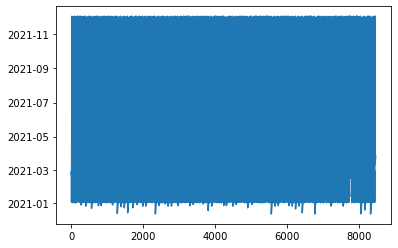

In [40]:
vaccination2.plot()

In [36]:
# 위에서 보는바와 같이 to_date를 통해서 바꾸게되면 자동으로  detect해서 날짜를 바꾸는것 같아 그래서인지 3월12일 경우 12월3일로 들어간게 아닐까 추측된다

In [37]:
vaccination3 = vaccination.astype({'date': 'datetime64[ns]'})
vaccination3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8451 non-null   object        
 1   iso_code                             8451 non-null   object        
 2   date                                 8451 non-null   datetime64[ns]
 3   total_vaccinations                   5231 non-null   float64       
 4   people_vaccinated                    4688 non-null   float64       
 5   people_fully_vaccinated              3186 non-null   float64       
 6   daily_vaccinations_raw               4415 non-null   float64       
 7   daily_vaccinations                   8260 non-null   float64       
 8   total_vaccinations_per_hundred       5231 non-null   float64       
 9   people_vaccinated_per_hundred        4688 non-null   float64       
 10  people_fully

In [41]:
vaccination3.date.max()

Timestamp('2021-12-03 00:00:00')

In [93]:
vaccination6 = pd.DataFrame( {'date':vaccination['date']})
vaccination6.head()
vaccination6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8451 non-null   object
dtypes: object(1)
memory usage: 66.1+ KB


In [106]:
vaccination6['new_date'] = pd.to_datetime(vaccination6['date'], format="%d/%m/%Y")
vaccination6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      8451 non-null   object        
 1   new_date  8451 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 132.2+ KB


In [111]:
vaccination6['new_date']

0      2021-02-22
1      2021-02-23
2      2021-02-24
3      2021-02-25
4      2021-02-26
          ...    
8446   2021-03-23
8447   2021-03-24
8448   2021-03-25
8449   2021-03-26
8450   2021-03-27
Name: new_date, Length: 8451, dtype: datetime64[ns]

In [114]:
vaccination6.new_date.dt.dayofyear

0       53
1       54
2       55
3       56
4       57
        ..
8446    82
8447    83
8448    84
8449    85
8450    86
Name: new_date, Length: 8451, dtype: int64

In [118]:
vaccination6.new_date.max() - vaccination6.new_date.min()

Timedelta('104 days 00:00:00')

In [120]:
vaccination6.new_date.value_counts().sort_index()

2020-12-13      5
2020-12-14      6
2020-12-15      8
2020-12-16      8
2020-12-17      8
             ... 
2021-03-23    109
2021-03-24    105
2021-03-25     88
2021-03-26     76
2021-03-27     44
Name: new_date, Length: 105, dtype: int64

<AxesSubplot:>

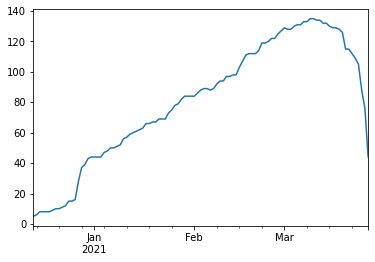

In [121]:
vaccination6.new_date.value_counts().sort_index().plot()

In [18]:
df_date = vaccination[['country','date','total_vaccinations']]
df_date['date'] = pd.to_datetime(df_date.date, format = '%d/%m/%Y')
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             8451 non-null   object        
 1   date                8451 non-null   datetime64[ns]
 2   total_vaccinations  5231 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 198.2+ KB


<ipython-input-18-bd4ba4b02637>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = pd.to_datetime(df_date.date, format = '%d/%m/%Y')


In [13]:
df_date.loc[8446,'date'].dt.month()

AttributeError: 'Timestamp' object has no attribute 'dt'

In [14]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [16]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [17]:
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [19]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [20]:
ufo.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [21]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [23]:
ufo.Time.dt.month

0         6
1         6
2         2
3         6
4         4
         ..
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: int64

In [24]:
ts = pd.to_datetime('1/1/1999')

In [27]:
ufo.loc[ufo.Time >=ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [30]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [31]:
%matplotlib inline

In [32]:
ufo['year'] = ufo.Time.dt.year

In [33]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


<AxesSubplot:>

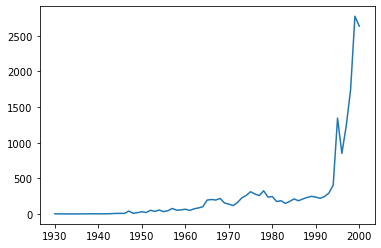

In [36]:
ufo.year.value_counts().sort_index().plot()